<a href="https://colab.research.google.com/github/jg4726/public-file/blob/main/Feature_correlation_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as pyplot


In [ ]:
#Question 1
#a
url='https://drive.google.com/file/d/1CYBJTh2Z0PFHln1kmRvsw5UkeudYZIWS/view'

url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url2,parse_dates=["date"])

In [ ]:
before_2k = df[df["date"] < pd.to_datetime("2000-01-01")]

after_2010 = df[df["date"] > pd.to_datetime("2010-01-01")]


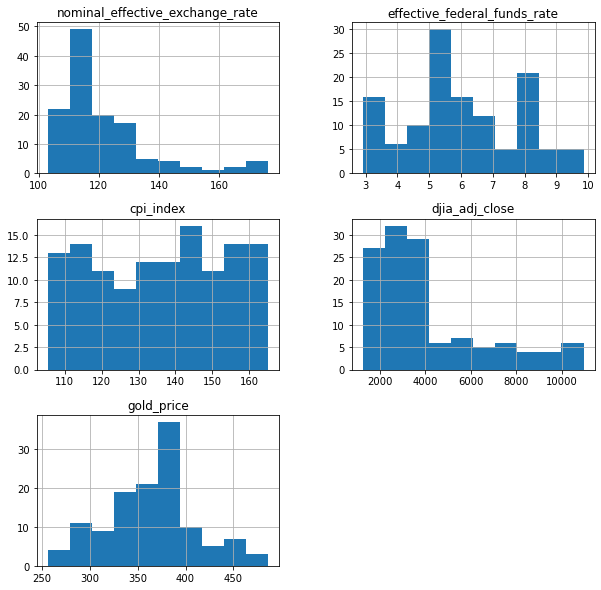

In [ ]:
#b histogram before 2000
hist = before_2k.loc[:,"nominal_effective_exchange_rate":"gold_price"].hist(figsize = (10,10))


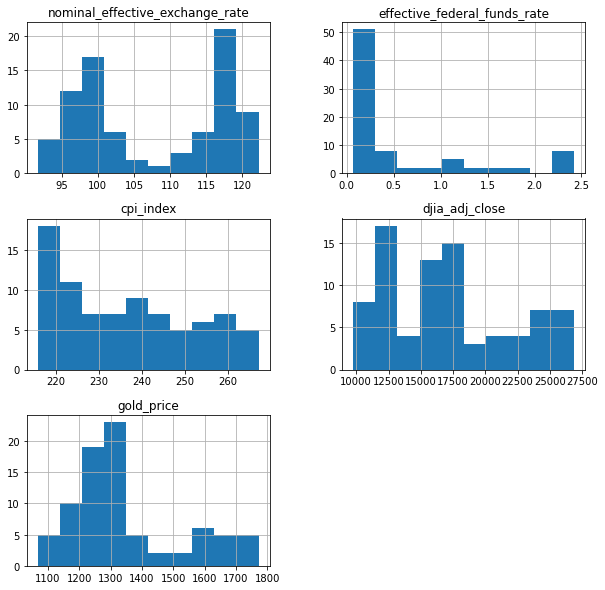

In [ ]:
#histograms after 2010
hist = after_2010.loc[:,"nominal_effective_exchange_rate":"gold_price"].hist(figsize = (10,10))

In [ ]:
#d The nominal exchange rates before 2000 is higher than that of after 2010.
#  The effective federal funds rates before 2000 is higher than that of after 2010.
#  Cpi is higher in 2010 than the data before 2000.
#  Djia data before 2000 is lower than that of after 2010.
#  Gold price before 2000 is lower than that of after 2010.
# The features look like in skewed normally distrition.
# Yes the distribution looks different in different years.
# Compare to full data, the data before 2000 is more similar to the full data than the data after 2010.
# The reasons might be that having more data before 2000 than after 2010. 


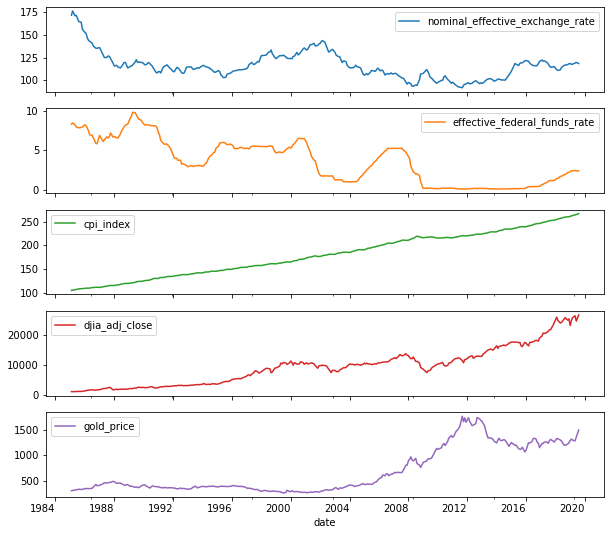

In [ ]:
#e line chart
lineplot = df.plot.line(x="date",rot=0,subplots =True,figsize = (10,10))


In [ ]:
#f
# The data before 2000 for nominal exchange and federal rate are higher than thpse data after 2010.
# The data before 2000 for CPI,Djia and gold price are lower than those data after 2010.

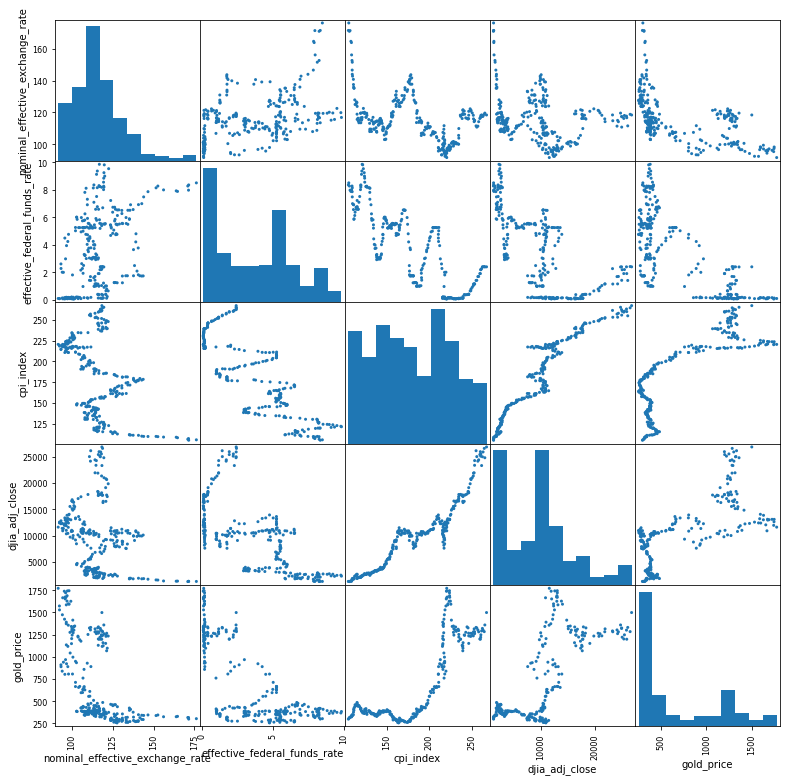

In [ ]:
#Feature Correlation
#a
pw_scatter = pd.plotting.scatter_matrix(df,alpha =1,figsize=(13,13))

In [ ]:
#b Djia and cpi and yes the scatter plot confirmed the.
#  Also gold price is also correlated with djia and cpi but not as strong as the cpi vs djia, which also supported by the plot

#c 
cor_num= df.corr(method = 'pearson',min_periods = 1)
cor_num

,nominal_effective_exchange_rate,effective_federal_funds_rate,cpi_index,djia_adj_close,gold_price
nominal_effective_exchange_rate,1.000000,0.461680,-0.461530,-0.270444,-0.541736
effective_federal_funds_rate,0.461680,1.000000,-0.818080,-0.664852,-0.717014
cpi_index,-0.461530,-0.818080,1.000000,0.938715,0.806134
djia_adj_close,-0.270444,-0.664852,0.938715,1.000000,0.713830
gold_price,-0.541736,-0.717014,0.806134,0.713830,1.000000


In [ ]:
#d
import matplotlib.pyplot as plt

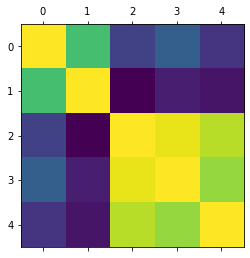

In [ ]:
plt.matshow(cor_num)

In [ ]:
import seaborn as sns

<AxesSubplot:>

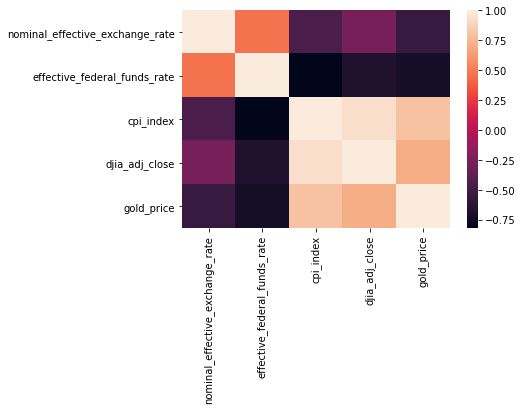

In [ ]:
sns.heatmap(cor_num)

In [ ]:
#e
# CPI index and djia are highly correlated
# Gold price is strongly correlated with cpi index and djia with CPI being more correlated than djia


In [ ]:
#3 Principal Component Analysis

#a
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale,normalize
from sklearn.preprocessing import StandardScaler
features = ['Nominal e e rate','e federal funds rate','cpi index','djia','gold price']
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [ ]:

pca_df = df.loc[:,"nominal_effective_exchange_rate":"gold_price"]

pca = PCA(n_components = 2)
pca.fit(pca_df)
pca.components_

array([[-0.000635, -0.000297, 0.006783, 0.998657, 0.051360],
       [-0.023172, -0.003063, 0.027649, -0.051531, 0.998015]])

In [ ]:
#b The third feature has the most contribution which is the CPI()
#c 

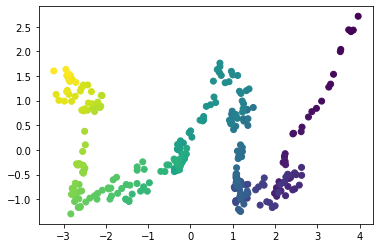

In [ ]:

df_scale = scale(pca_df)
pca_trans = pca.fit_transform(df_scale)
pca_comp = pca.components_
plt.scatter(pca_trans[:,0],pca_trans[:,1],c=y)

plt.show()

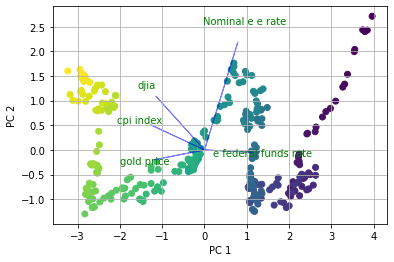

In [ ]:
#d Biplot

plt.scatter(pca_trans[:,0],pca_trans[:,1], c = y)

co = np.transpose(pca.components_[0:2, :])
count = n.shape[0]   
for i in range(count):
    plt.arrow(0, 0, co[i,0]*2.5, co[i,1]*2.5,color = 'b',alpha = 0.5)
    plt.text(co[i,0]* 3, co[i,1] * 3, features[i], color = 'g', ha = 'center', va = 'center')
    

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid()

#plt.show()



In [ ]:
#e CPI is very correlated with djia and gold price because cpi index influence the stock market and the gold price
#  which can be verified using python code below
np.corrcoef(df_standard[:,2],df_standard[:,3])[1,0]

0.9387147483456874

In [ ]:
np.corrcoef(df_standard[:,3],df_standard[:,4])[1,0]


0.7138301270011655

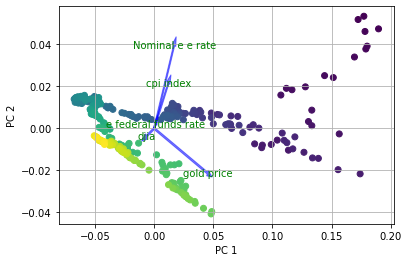

In [ ]:
#f
#df_standard = StandardScaler().fit_transform(pca_df)

df_normalize = normalize(pca_df)
pca_trans = pca.fit_transform(df_normalize)
pca_comp = pca.components_
plt.scatter(pca_trans[:,0],pca_trans[:,1],c=y)
co = np.transpose(pca.components_[0:2, :])
count = n.shape[0]   
for i in range(count):
    plt.arrow(0, 0, co[i,0]*0.05, co[i,1]*0.05,color = 'b',alpha = 0.5)
    plt.text(co[i,0]*0.05, co[i,1]*0.05 , features[i], color = 'g', ha = 'center', va = 'center')
    

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid()
plt.show()


In [ ]:
#Yes the results are different. The scaled method makes more sense

In [ ]:
#4
#a
add='https://drive.google.com/file/d/1H9GFp0sY1a2N-w-Nbx-V9BdRP746aChp/view'

add_final='https://drive.google.com/uc?id=' + add.split('/')[-2]
df_2 = pd.read_csv(add_final,parse_dates=["date"])


In [ ]:
#b
import seaborn as sns

In [ ]:
df_2.isna().sum()

date                                0
nominal_effective_exchange_rate    94
effective_federal_funds_rate       92
cpi_index                          81
djia_adj_close                     91
gold_price                          0
dtype: int64

In [ ]:
#c
df_mean=df_2.iloc[:,1:5].mean()
df_2 = df_2.fillna(df_mean)
df_2
# It doesn't make sense for Djia, cpi and gold price because their trend is going up in value as time passed


,date,nominal_effective_exchange_rate,effective_federal_funds_rate,cpi_index,djia_adj_close,gold_price
0,1985-02-01,116.097363,8.350000,105.300000,1286.770020,299.1
1,1985-03-01,116.097363,3.641569,105.800000,1284.010010,303.9
2,1985-05-01,170.949545,8.270000,106.500000,1258.060059,316.4
3,1985-06-01,171.393913,7.970000,178.765363,1315.410034,316.5
4,1985-08-01,164.653478,3.641569,108.300000,1347.449951,329.8
...,...,...,...,...,...,...
291,2019-02-01,117.455217,2.400000,262.284000,10060.052075,1320.1
292,2019-03-01,116.097363,2.400000,263.057000,25916.000000,1300.9
293,2019-05-01,116.097363,2.420000,264.452000,26592.910156,1284.0
294,2019-06-01,116.097363,2.390000,265.137000,24815.039063,1359.0


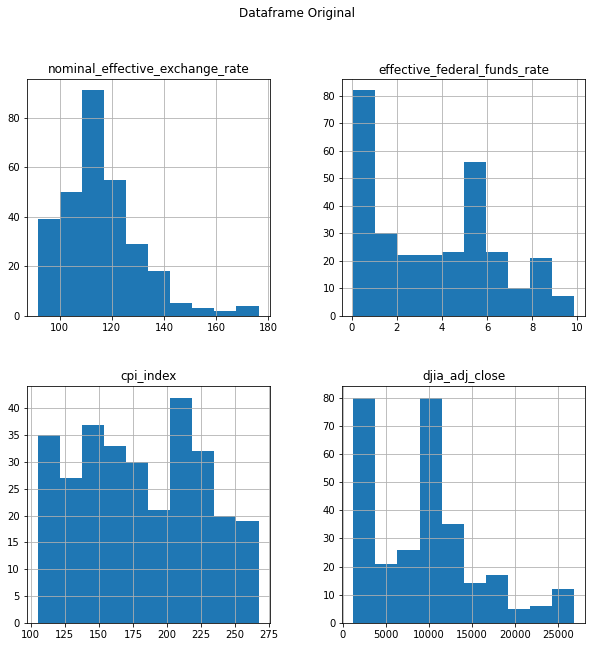

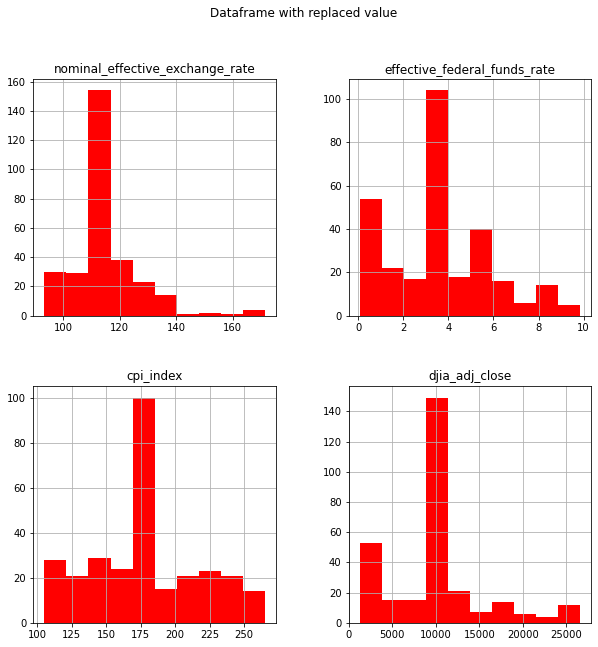

In [ ]:
#d Almost all features distribution converge into the center

hist_1 = df.iloc[:,1:5].hist(figsize = (10,10))
plt.suptitle("Dataframe Original")
plt.show()
hist_2 = df_2.iloc[:,1:5].hist(figsize = (10,10),color = "r")
plt.suptitle("Dataframe with replaced value")
plt.show()

In [ ]:
df_2.iloc[:,1:5].describe()#the new data


,nominal_effective_exchange_rate,effective_federal_funds_rate,cpi_index,djia_adj_close
count,296.000000,296.000000,296.000000,296.000000
mean,116.097363,3.641569,178.765363,10060.052075
std,11.634276,2.304446,39.245859,5445.365374
min,93.366667,0.070000,105.300000,1258.060059
25%,110.910109,1.982500,150.375000,7891.879883
50%,116.097363,3.641569,178.765363,10060.052075
75%,117.723864,5.250000,204.889250,10976.452393
max,171.393913,9.850000,265.137000,26592.910156


In [ ]:
df.iloc[:,1:5].describe()#this is original data

,nominal_effective_exchange_rate,effective_federal_funds_rate,cpi_index,djia_adj_close
count,296.000000,296.000000,296.000000,296.000000
mean,115.890172,3.621047,180.961818,9664.794209
std,14.636330,2.794171,45.264254,6258.804946
min,91.683043,0.070000,105.300000,1258.060059
25%,106.889269,0.995000,142.300000,3633.209961
50%,114.592826,3.560000,179.600000,10018.145020
75%,121.318556,5.560000,218.074500,12582.765137
max,176.187000,9.850000,267.101000,26864.269531
